In [1]:
getwd()

[1] "/home/user/Desktop"

In [2]:
library(ggplot2)

In [13]:
df1 = data.frame(genes = paste0("genes_", seq(1, 10)), matrix(sample(round(rnorm(120, 4, 4), 2)), 10, 12))
colnames(df1)[-1] = paste0("sample", seq(1, 12))
df1

genes,sample1,sample2,sample3,sample4,sample5,sample6,sample7,sample8,sample9,sample10,sample11,sample12
genes_1,9.71,4.64,9.58,3.59,-2.13,6.68,5.76,6.89,1.68,5.56,3.25,4.41
genes_2,5.59,2.44,-3.47,4.01,-0.87,1.92,-7.25,5.40,9.63,-1.62,6.32,0.30
genes_3,9.90,1.10,9.39,0.83,10.88,3.18,0.91,5.74,1.75,6.47,-2.04,-2.33
genes_4,0.96,3.95,2.01,-0.28,7.77,6.66,-0.65,2.55,0.66,9.87,0.75,-4.47
genes_5,10.52,2.27,-5.10,7.59,2.24,-0.75,8.28,4.02,7.12,5.38,7.10,2.80
genes_6,1.63,2.73,2.29,12.65,1.56,6.17,3.98,8.25,4.93,2.87,-2.10,7.37
genes_7,5.55,3.60,12.62,2.92,3.51,8.98,4.84,5.15,3.46,5.31,4.76,3.02
genes_8,-3.90,0.64,6.91,4.47,6.50,3.60,6.07,7.49,2.61,0.26,10.09,-0.39
genes_9,4.35,3.89,4.85,-3.49,-0.81,4.34,4.30,7.38,3.84,6.03,3.60,4.84
genes_10,5.29,2.86,2.27,7.66,2.41,1.94,0.70,7.55,2.66,7.10,4.72,-4.58


In [3]:
colMeans(df1[,-1])

sample1  sample2  sample3  sample4  sample5  sample6  sample7  sample8 
   4.125    5.675    4.179    5.933    4.112    4.736    2.425    6.132 
 sample9 sample10 sample11 sample12 
   4.877    4.318    3.399    2.726

In [14]:
pheno = data.frame(samples=paste0("sample", seq(1, 12)),time = rep(paste0("time", seq(1, 3)),4), mean=colMeans(df1[,-1]))
pheno

,samples,time,mean
sample1,sample1,time1,4.960
sample2,sample2,time2,2.812
sample3,sample3,time3,4.135
sample4,sample4,time1,3.995
sample5,sample5,time2,3.106
sample6,sample6,time3,4.272
sample7,sample7,time1,2.694
sample8,sample8,time2,6.042
sample9,sample9,time3,3.834
sample10,sample10,time1,4.723


In [5]:
library(tidyr)

In [6]:
df2 = gather(df1, "sample", "expression", -genes)

In [7]:
df3 = merge(df2, pheno, by.x = "sample", by.y = "samples")

In [8]:
library(ggplot2)

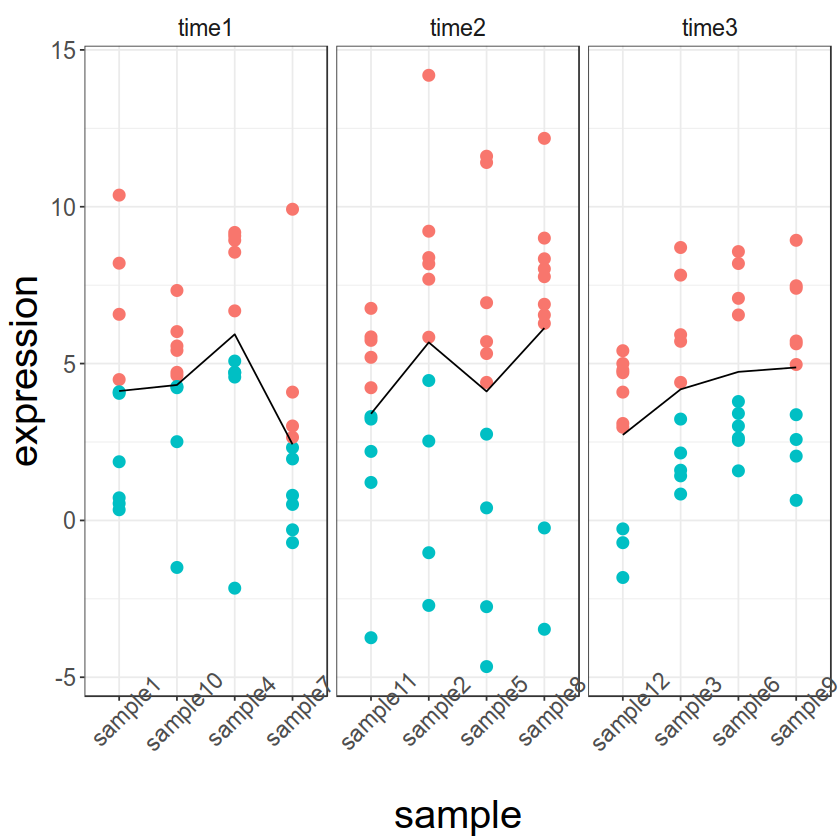

In [12]:
ggplot(df3, aes(sample, expression ))+
    geom_point(size=3,aes(color= expression<mean))+
    facet_grid(~ time, scales = c('free'),space = "free")+
    theme_bw()+
    theme(legend.position = "none")+
    stat_summary(fun.y=mean, geom="line", aes(group=1))+
    theme(
        strip.text.x = element_text(size = 14),
        strip.background = element_blank(),
        axis.text.x = element_text(size = 14, angle=45),
        axis.text.y = element_text(size = 14),
        axis.title.x = element_text(size = 24),
        axis.title.y = element_text(size = 24),
    )